# Mental Health in the Tech Industry
TODO meaningful text
years 2016 - 2019

## Setup

In [1]:
# Setup
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None

In [2]:
# Establish connection to db
con = sqlite3.connect('mental_health.sqlite')
cur = con.cursor()

In [3]:
# Transform 'Question' table into dataframe
questions = pd.read_sql_query("SELECT * FROM Question", con)

In [4]:
# Transform 'Answer' table into dataframe
df = pd.read_sql_query("SELECT * FROM Answer WHERE NOT SurveyID=2014", con)

In [5]:
# Customize dataframe
df.rename(columns={'SurveyID': 'Year'}, inplace = True)

## Question catalog

In [6]:
# Q2: "What is your gender?"
q2 = df[(df['QuestionID'] == 2) & (df['AnswerText'] != -1)]

## Characteristics of the participants

### Gender distribution

#### Gender setup

In [7]:
# Change "AnswerText" to "Gender"
q2.rename(columns={'AnswerText': 'Gender'}, inplace = True)

In [8]:
# Capitalize all entries
q2.Gender = q2.Gender.str.capitalize()
q2.head()

,Gender,Year,UserID,QuestionID
1433,Male,2016,1261,2
1434,Male,2016,1262,2
1435,Male,2016,1263,2
1436,Male,2016,1264,2
1437,Female,2016,1265,2


In [9]:
# Change non-"Male" and non-"Female" answer to "Diverse"
q2['Gender'] = np.where(((q2.Gender != 'Male') & (q2.Gender != 'Female')), 'Diverse', q2.Gender)


In [10]:
# Participants by year
q2_by_year = q2.groupby('Year').size().reset_index(name="Count")
print(q2_by_year)

   Year  Count
0  2016   1433
1  2017    756
2  2018    417
3  2019    352


#### Gender analysis

In [11]:
# Genders by year
q2_by_gender_and_year = q2.groupby(['Gender', 'Year']).size().reset_index(name="Count")
print(q2_by_gender_and_year)

     Gender  Year  Count
0   Diverse  2016     40
1   Diverse  2017     36
2   Diverse  2018     26
3   Diverse  2019     27
4    Female  2016    336
5    Female  2017    218
6    Female  2018    125
7    Female  2019     98
8      Male  2016   1057
9      Male  2017    502
10     Male  2018    266
11     Male  2019    227


In [16]:
# Genders total
genders_total = q2.groupby('Gender').size().reset_index(name="Count")
print(genders_total)

    Gender  Count
0  Diverse    129
1   Female    777
2     Male   2052


In [17]:
# Genders total in %
values_total = genders_total.Count.sum()

percentage = [genders_total.at[0, 'Count'] / values_total * 100, 
genders_total.at[1, 'Count'] / values_total * 100, 
genders_total.at[2, 'Count'] / values_total * 100 ]

genders_total_percent = genders_total
genders_total_percent['Percentage'] = percentage
print(genders_total_percent)

    Gender  Count  Percentage
0  Diverse    129    4.361055
1   Female    777   26.267748
2     Male   2052   69.371197


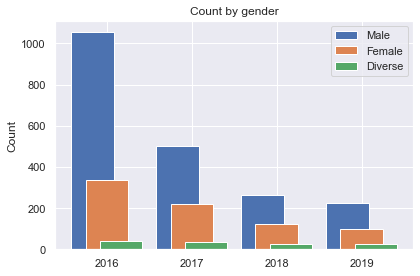

In [18]:
# Participants by year visualized
labels = ['2016', '2017', '2018', '2019']

male_count = [q2_by_gender_and_year.at[8, 'Count'], 
q2_by_gender_and_year.at[9, 'Count'], 
q2_by_gender_and_year.at[10, 'Count'], 
q2_by_gender_and_year.at[11, 'Count']]

female_count = [q2_by_gender_and_year.at[4, 'Count'], 
q2_by_gender_and_year.at[5, 'Count'], 
q2_by_gender_and_year.at[6, 'Count'], 
q2_by_gender_and_year.at[7, 'Count']]

diverse_count = [q2_by_gender_and_year.at[0, 'Count'], 
q2_by_gender_and_year.at[1, 'Count'], 
q2_by_gender_and_year.at[2, 'Count'], 
q2_by_gender_and_year.at[3, 'Count']]

x = np.arange(len(labels))
width = 0.5 

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/3, male_count, width, label='Male')
rects2 = ax.bar(x, female_count, width, label='Female')
rects3 = ax.bar(x + width/3, diverse_count, width, label='Diverse')

ax.set_ylabel('Count')
ax.set_title('Count by gender')
ax.set_xticks(x, labels)
ax.legend()

fig.tight_layout()

plt.show()

### Age distribution

## Hypotheses